In [ ]:
mport
pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the data
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define features (X) and target (y)
X = df.drop(['bad_flag', 'account_number'], axis=1)  # Drop target and ID columns
y = df['bad_flag']
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(1)

# Divide target into 100 probability bins
# y_smote_prob = (y_smote * 100).astype(int)  # Scale 0/1 into 0–100 bins

# Encode target for neural network
# y_smote_encoded = to_categorical(y_smote_prob, num_classes=101)
print(2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
y_train.shape

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer

    Dense(101, activation='softmax')  # Output layer (101 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model


X_train_scaled.shape[1]
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the trained model
model.save('credit_default_model.h5')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define features (X) and target (y)
X = df.drop(['bad_flag', 'account_number'], axis=1)  # Drop target and ID columns
y = df['bad_flag']  # Target variable

# Split data into train and test sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for the test data

In [2]:

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (1 node for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
4772/4772 [==============================] - 13s 2ms/step - loss: 0.1491 - accuracy: 0.9437 - val_loss: 0.1957 - val_accuracy: 0.9567
Epoch 2/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0560 - accuracy: 0.9810 - val_loss: 0.2522 - val_accuracy: 0.9628
Epoch 3/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.2537 - val_accuracy: 0.9720
Epoch 4/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.2463 - val_accuracy: 0.9751
Epoch 5/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.2816 - val_accuracy: 0.9770
Epoch 6/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.2915 - val_accuracy: 0.9709
Epoch 7/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.3315 - val_ac

In [3]:

# Evaluate the model on the test dataset
y_pred_prob = model.predict(X_test_scaled)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

606/606 [==============================] - 1s 2ms/step


In [4]:
y_pred_prob

array([[1.3945373e-20],
       [2.9295552e-05],
       [5.1819353e-04],
       ...,
       [5.4613442e-11],
       [1.3406897e-19],
       [2.3459909e-28]], dtype=float32)

In [5]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

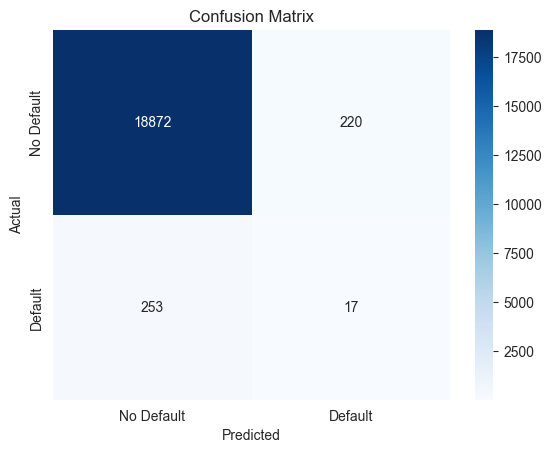

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19092
           1       0.07      0.06      0.07       270

    accuracy                           0.98     19362
   macro avg       0.53      0.53      0.53     19362
weighted avg       0.97      0.98      0.97     19362

F1 Score: 0.0670611439842209
INFO:tensorflow:Assets written to: ram://3e9d9779-d4e5-4702-bada-68d09798bc51/assets
Model and scaler saved.
Predictions saved to 'credit_risk_predictions.csv'


In [6]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report and F1 Score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Save the model and scaler
joblib.dump(model, "credit_risk_model.h5")  # Save the trained model
joblib.dump(scaler, "scaler_model.joblib")  # Save the scaler used for scaling the features
print("Model and scaler saved.")

# Optional: Save the predictions for submission
predictions = pd.DataFrame({
    'account_number': df.loc[y_test.index, 'account_number'],  # Account numbers for the test set
    'predicted_probability': y_pred_prob.flatten()  # Flatten to get the probability for submission
})
predictions.to_csv('credit_risk_predictions.csv', index=False)
print("Predictions saved to 'credit_risk_predictions.csv'")


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Dev_data_to_be_shared.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Replace missing values with 0
df.fillna(0, inplace=True)

# Define features (X) and target (y)
X = df.drop(['bad_flag', 'account_number'], axis=1)  # Drop target and ID columns
y = df['bad_flag']  # Target variable

# Split data into train and test sets (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for the test data

# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (1 node for binary classification)
])

In [8]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.1478 - accuracy: 0.9430 - val_loss: 0.1855 - val_accuracy: 0.9673
Epoch 2/20
4772/4772 [==============================] - 10s 2ms/step - loss: 0.0583 - accuracy: 0.9800 - val_loss: 0.2206 - val_accuracy: 0.9674
Epoch 3/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.2405 - val_accuracy: 0.9722
Epoch 4/20
4772/4772 [==============================] - 10s 2ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.2569 - val_accuracy: 0.9780
Epoch 5/20
4772/4772 [==============================] - 11s 2ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.2692 - val_accuracy: 0.9751
Epoch 6/20
4772/4772 [==============================] - 13s 3ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.2758 - val_accuracy: 0.9723
Epoch 7/20
4772/4772 [==============================] - 12s 2ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.2855 - val_ac

In [9]:

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test_scaled)  # Get predicted probabilities (continuous values between 0 and 1)

# **Step 1: Round the probabilities to the nearest 0.01**
y_pred_prob_rounded = np.round(y_pred_prob, 2)  # Round probabilities to 2 decimal places (nearest 0.01)

# **Step 2: Convert to 1–100 Behavior Score**
behavior_scores = (y_pred_prob_rounded * 100).astype(int)  # Scale probabilities to scores between 1 and 100

606/606 [==============================] - 1s 1ms/step


In [10]:
y_pred_prob

array([[6.1019353e-21],
       [2.5633765e-06],
       [6.3148815e-05],
       ...,
       [6.4440530e-18],
       [1.8486092e-22],
       [4.5050349e-30]], dtype=float32)

In [11]:
y_pred_prob_rounded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [12]:
behavior_scores

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [13]:

# Print sample probabilities and behavior scores
print("Sample Probabilities:", y_pred_prob_rounded[:10].flatten())
print("Sample Behavior Scores:", behavior_scores[:10].flatten())

Sample Probabilities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample Behavior Scores: [0 0 0 0 0 0 0 0 0 0]


In [14]:

# Evaluate the model on the test dataset (using rounded probabilities)
y_pred = (y_pred_prob_rounded > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

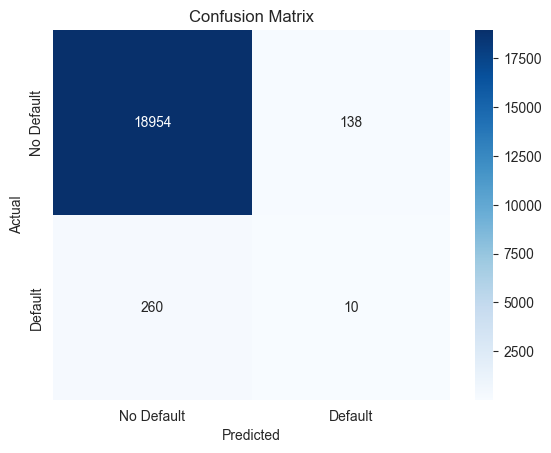

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19092
           1       0.07      0.04      0.05       270

    accuracy                           0.98     19362
   macro avg       0.53      0.51      0.52     19362
weighted avg       0.97      0.98      0.98     19362

F1 Score: 0.04784688995215311


In [15]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report and F1 Score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1_score(y_test, y_pred)}")

In [16]:

# Optional: Save the behavior scores for submission
submission = pd.DataFrame({
    'account_number': df.loc[y_test.index, 'account_number'],  # Account numbers for the test set
    'predicted_probability': y_pred_prob_rounded.flatten(),  # Rounded probabilities
    'behavior_score': behavior_scores.flatten()  # 1–100 behavior scores
})
submission.to_csv('credit_risk_behavior_scores.csv', index=False)
print("Behavior scores saved to 'credit_risk_behavior_scores.csv'")


Behavior scores saved to 'credit_risk_behavior_scores.csv'
